In [1]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the 2-layer XOR gate neural network class
class XORGateNN:
    def __init__(self):
        # Initialize the weights randomly with mean 0
        self.synaptic_weights_0 = 2 * np.random.random((2, 3)) - 1
        self.synaptic_weights_1 = 2 * np.random.random((3, 1)) - 1

    def train(self, training_inputs, training_outputs, num_iterations):
        for iteration in range(num_iterations):
            # Forward propagation
            layer_0 = training_inputs
            layer_1 = sigmoid(np.dot(layer_0, self.synaptic_weights_0))
            layer_2 = sigmoid(np.dot(layer_1, self.synaptic_weights_1))

            # Calculate the error
            error = training_outputs - layer_2

            # Backpropagation
            delta_2 = error * sigmoid_derivative(layer_2)
            delta_1 = delta_2.dot(self.synaptic_weights_1.T) * sigmoid_derivative(layer_1)

            # Update the weights
            self.synaptic_weights_1 += layer_1.T.dot(delta_2)
            self.synaptic_weights_0 += layer_0.T.dot(delta_1)

    def predict(self, inputs):
        layer_0 = inputs
        layer_1 = sigmoid(np.dot(layer_0, self.synaptic_weights_0))
        layer_2 = sigmoid(np.dot(layer_1, self.synaptic_weights_1))
        return layer_2

# Define the input dataset and expected outputs
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_outputs = np.array([[0, 1, 1, 0]]).T

# Initialize the XOR gate neural network
xor_gate = XORGateNN()

# Train the neural network
xor_gate.train(training_inputs, training_outputs, num_iterations=10000)

# Test the neural network
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for test_input in test_inputs:
    predicted_output = xor_gate.predict(test_input)
    print(f"Input: {test_input} Predicted Output: {predicted_output}")

Input: [0 0] Predicted Output: [0.02270659]
Input: [0 1] Predicted Output: [0.98006491]
Input: [1 0] Predicted Output: [0.97991747]
Input: [1 1] Predicted Output: [0.50051711]


4
For input [1, 0] output is 1
For input [0, 0] output is 0
For input [0, 1] output is 1
For input [1, 1] output is 0


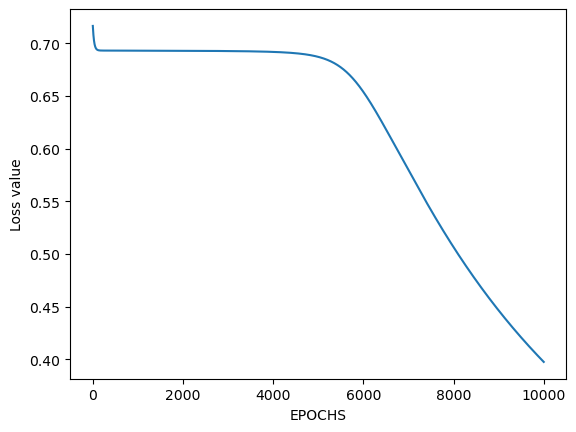

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# These are XOR inputs
x=np.array([[0,0,1,1],[0,1,0,1]])
# These are XOR outputs
y=np.array([[0,1,1,0]])
# Number of inputs
n_x = 2
# Number of neurons in output layer
n_y = 1
# Number of neurons in hidden layer
n_h = 2
# Total training examples
m = x.shape[1]
# Learning rate
lr = 0.1
# Define random seed for consistent results
np.random.seed(2)
# Define weight matrices for neural network
w1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
w2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
# I didnt use bias units
# We will use this list to accumulate losses
losses = []

print(m)

# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)    
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)
    
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1
    
iterations = 10000
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x)
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2))
    losses.append(loss)
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y)
    w2 = w2-lr*dw2
    w1 = w1-lr*dw1

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_prop(w1,w2,test)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")
        

test = np.array([[1],[0]])
predict(w1,w2,test)
test = np.array([[0],[0]])
predict(w1,w2,test)
test = np.array([[0],[1]])
predict(w1,w2,test)
test = np.array([[1],[1]])
predict(w1,w2,test)

In [6]:
# Fachri Hidayat 21060120130135
# Muhammad Ibnu Harist Afandy 21060120140163
# William Joshua Nainggolan 21060120140157